In [89]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [94]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

sex_dict = {"Male": "Female", "Female": "Male"}

# male female DARs

In [97]:
dar_path_dict_dict = {
    "master_celltypefair_1": {
        x.split("/")[-1].split("__")[-2]: x
        for x in glob.glob(
            "harmony_consensus_cell_type__mega_male_female_DARs/master_celltypefair_1.FIXEDCELLS/*_DARs.bed"
        )
    }
}
dar_path_dict_dict

{'master_celltypefair_1': {'sampleB_B_cell_VS_sampleA_B_cell': 'harmony_consensus_cell_type__mega_male_female_DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__sampleB_B_cell_VS_sampleA_B_cell__1-2xfoldchange_DARs.bed',
  'sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte': 'harmony_consensus_cell_type__mega_male_female_DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte__1-2xfoldchange_DARs.bed',
  'sampleA_B_cell_VS_sampleB_B_cell': 'harmony_consensus_cell_type__mega_male_female_DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__sampleA_B_cell_VS_sampleB_B_cell__1-2xfoldchange_DARs.bed',
  'sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell': 'harmony_consensus_cell_type__mega_male_female_DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell__1-2xfoldchange_DARs.bed',
  'sampleB_Cytotoxic_T_cell_VS_samp

In [98]:
df_merged = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:1000]])

master_celltypefair_1
sampleB_B_cell_VS_sampleA_B_cell
sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte
sampleA_B_cell_VS_sampleB_B_cell
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte
sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte
sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell
sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell


In [99]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [100]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

In [101]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [102]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech
0,chr13,94558629,94559129,sampleB_B_cell_VS_sampleA_B_cell,0.934628,.,3.292958e-04,master_celltypefair_1,celltypefair
1,chr11,72333370,72333870,sampleB_B_cell_VS_sampleA_B_cell,0.806161,.,4.479245e-02,master_celltypefair_1,celltypefair
2,chr12,94013842,94014342,sampleB_B_cell_VS_sampleA_B_cell,0.806067,.,8.550009e-05,master_celltypefair_1,celltypefair
3,chr11,14148649,14149149,sampleB_B_cell_VS_sampleA_B_cell,0.742243,.,2.295691e-14,master_celltypefair_1,celltypefair
4,chr7,134562101,134562601,sampleB_B_cell_VS_sampleA_B_cell,0.697624,.,9.845501e-13,master_celltypefair_1,celltypefair
...,...,...,...,...,...,...,...,...,...
995,chr12,109864251,109864751,sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell,0.295350,.,1.150981e-03,master_celltypefair_1,celltypefair
996,chr2,121700600,121701100,sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell,0.295238,.,1.978870e-09,master_celltypefair_1,celltypefair
997,chr20,51416895,51417395,sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell,0.295155,.,1.354332e-09,master_celltypefair_1,celltypefair
998,chr10,43225403,43225903,sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell,0.295128,.,1.773783e-05,master_celltypefair_1,celltypefair


In [103]:
cell_type_alias_dict

{'B_cell': 'B cells',
 'CD14+_monocyte': 'CD14+ monocytes',
 'CD4+_T_cell': 'CD4+ T cells',
 'Cytotoxic_T_cell': 'CD8+ T cells',
 'Dendritic_cell': 'Dendritic cells',
 'Natural_killer_cell': 'NK cells',
 'CD16+_monocyte': 'CD16+ monocytes'}

In [104]:
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [105]:
df_merged["cell_type_specific"] = [
    cell_type_alias_dict[
        x.replace("sampleA_", "").replace("sampleB_", "").split("_VS_")[0]
    ]
    for x in df_merged["cell_type"]
]

In [106]:
cell_type_alias_dict

{'B_cell': 'B cells',
 'CD14+_monocyte': 'CD14+ monocytes',
 'CD4+_T_cell': 'CD4+ T cells',
 'Cytotoxic_T_cell': 'CD8+ T cells',
 'Dendritic_cell': 'Dendritic cells',
 'Natural_killer_cell': 'NK cells',
 'CD16+_monocyte': 'CD16+ monocytes'}

In [107]:
df_merged = df_merged.sort_values(["cell_type_specific", "cell_type"])

In [108]:
df_merged["sex"] = [
    x.split("_")[0]
    .replace("_", " ")
    .replace("sampleA", "Male")
    .replace("sampleB", "Female")
    for x in df_merged["cell_type"]
]

In [109]:
# cell_type_alias_dict = {
#     x: x.split("_VS_")[0]
#     .replace("_", " ")
#     .replace("sampleA", "Male")
#     .replace("sampleB", "Female")
#     + "s"
#     for x in labels
# }

In [110]:
# cell_type_alias_dict = {
#     "sampleA_B_cell_VS_sampleB_B_cell": "Male B cells",
#     "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte": "Male CD14+ monocytes",
#     "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte": "Male CD16+ monocytes",
#     "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell": "Male CD4+ T cells",
#     "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell": "Male Cytotoxic T cells",
#     "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell": "Male Natural killer cells",
#     "sampleB_B_cell_VS_sampleA_B_cell": "Female B cells",
#     "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte": "Female CD14+ monocytes",
#     "sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte": "Female CD16+ monocytes",
#     "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell": "Female CD4+ T cells",
#     "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell": "Female Cytotoxic T cells",
#     "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell": "Female Natural killer cells",
# }

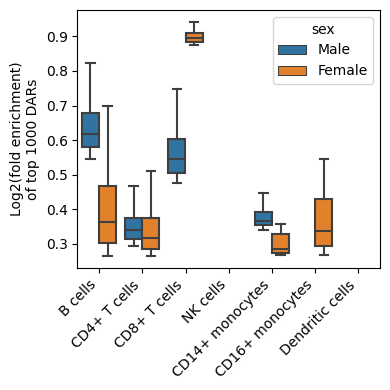

In [111]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    df_merged,
    x="cell_type_specific",
    y="logfc",
    hue="sex",
    # order=cell_type_order,
    order=[cell_type_alias_dict[x] for x in cell_type_order],
    # palette=tech_color_palette,
    ax=ax,
    fliersize=0,
    showfliers=False,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment)\nof top 1000 DARs")
plt.xlabel("")
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels_alias = [cell_type_alias_dict[x] for x in labels]
# x.set_xticklabels(labels_alias)


# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(
#     handles[0 : len(tech_order)],
#     [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
#     bbox_to_anchor=(1.05, 1),
#     loc=2,
#     borderaxespad=0.0,
# )
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top1k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top1k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

In [118]:
df_merged[
    (df_merged["sex"] == "Female") & (df_merged["cell_type_specific"] == "CD8+ T cells")
]

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech,cell_type_specific,sex
0,chr6,14841751,14842251,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.947012,.,6.489569e-66,master_celltypefair_1,celltypefair,CD8+ T cells,Female
1,chr6,81968976,81969476,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.942487,.,5.090951e-16,master_celltypefair_1,celltypefair,CD8+ T cells,Female
2,chr7,151939973,151940473,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.940619,.,2.108520e-16,master_celltypefair_1,celltypefair,CD8+ T cells,Female
3,chr12,2333778,2334278,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.939629,.,5.055002e-16,master_celltypefair_1,celltypefair,CD8+ T cells,Female
4,chr13,73335074,73335574,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.939127,.,9.121077e-16,master_celltypefair_1,celltypefair,CD8+ T cells,Female
...,...,...,...,...,...,...,...,...,...,...,...
995,chr20,1569319,1569819,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.876061,.,1.071635e-18,master_celltypefair_1,celltypefair,CD8+ T cells,Female
996,chr10,124142887,124143387,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.876023,.,1.684953e-22,master_celltypefair_1,celltypefair,CD8+ T cells,Female
997,chrX,39492561,39493061,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.876012,.,2.905259e-20,master_celltypefair_1,celltypefair,CD8+ T cells,Female
998,chr2,101973016,101973516,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.875905,.,5.970802e-16,master_celltypefair_1,celltypefair,CD8+ T cells,Female


In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    df_merged,
    x="cell_type_specific",
    y="logfc",
    hue="sex",
    # order=cell_type_order,
    order=[cell_type_alias_dict[x] for x in cell_type_order],
    # palette=tech_color_palette,
    ax=ax,
    fliersize=0,
    showfliers=False,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment)\nof top 1000 DARs")
plt.xlabel("")
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels_alias = [cell_type_alias_dict[x] for x in labels]
# x.set_xticklabels(labels_alias)


# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(
#     handles[0 : len(tech_order)],
#     [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
#     bbox_to_anchor=(1.05, 1),
#     loc=2,
#     borderaxespad=0.0,
# )
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top1k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top1k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# calculate accessibility in these DARs

In [24]:
import pickle

cto_path = "cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.dimreduc.pkl"
with open(cto_path, "rb") as f:
    cto = pickle.load(f)

In [25]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech,cell_type_specific,sex
0,chr19,40463415,40463915,sampleA_B_cell_VS_sampleB_B_cell,1.044586,.,1.403635e-02,master_celltypefair_1,celltypefair,B cells,Male
1,chr1,237864345,237864845,sampleA_B_cell_VS_sampleB_B_cell,1.025338,.,7.109009e-04,master_celltypefair_1,celltypefair,B cells,Male
2,chr10,93463018,93463518,sampleA_B_cell_VS_sampleB_B_cell,0.986328,.,3.795310e-22,master_celltypefair_1,celltypefair,B cells,Male
3,chr2,142880197,142880697,sampleA_B_cell_VS_sampleB_B_cell,0.966685,.,7.318674e-12,master_celltypefair_1,celltypefair,B cells,Male
4,chr15,70777466,70777966,sampleA_B_cell_VS_sampleB_B_cell,0.948006,.,7.674732e-03,master_celltypefair_1,celltypefair,B cells,Male
...,...,...,...,...,...,...,...,...,...,...,...
995,chr20,1569319,1569819,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.876061,.,1.071635e-18,master_celltypefair_1,celltypefair,CD8+ T cells,Female
996,chr10,124142887,124143387,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.876023,.,1.684953e-22,master_celltypefair_1,celltypefair,CD8+ T cells,Female
997,chrX,39492561,39493061,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.876012,.,2.905259e-20,master_celltypefair_1,celltypefair,CD8+ T cells,Female
998,chr2,101973016,101973516,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.875905,.,5.970802e-16,master_celltypefair_1,celltypefair,CD8+ T cells,Female


In [26]:
cto.cell_data["harmony_consensus_cell_type__mega"] = [
    x.replace("Cytotoxic T cell", "CD8+ T cell")
    for x in cto.cell_data["harmony_consensus_cell_type__mega"]
]

In [27]:
cto.cell_data["fmx_sample"].value_counts()

sampleA    13792
sampleB    11735
Name: fmx_sample, dtype: int64

In [28]:
tmp_df = cto.cell_data.copy()

In [29]:
tmp_df["fmx_sample"].fillna("none", inplace=True)
tmp_df.groupby("tech")["fmx_sample"].value_counts()

tech         fmx_sample
10xmultiome  sampleA       2566
             sampleB       1866
10xv1        sampleA       2308
             sampleB       2124
10xv11       none          1741
             sampleA       1463
             sampleB       1228
10xv2        none          2349
             sampleA       1181
             sampleB        902
ddseq        none          3203
             sampleA        781
             sampleB        448
hydrop       sampleB       1792
             sampleA       1610
             none          1030
mtscatac     sampleA       2253
             sampleB       2179
s3atac       sampleA       1630
             none          1606
             sampleB       1196
Name: fmx_sample, dtype: int64

In [30]:
cto.cell_data["fmx_sample"].fillna("none", inplace=True)
cto.cell_data["sex"] = [
    x.replace("sampleA", "Male").replace("sampleB", "Female")
    for x in cto.cell_data["fmx_sample"]
]

In [31]:
cto.cell_data["sex"]

GAAGCAGCGGAATGATGCTCGTTCCAAT___OHS_s3atac_1.FIXEDCELLS    Female
AGGCAGAATGGTATTATTGGTCACGA___OHS_s3atac_2.FIXEDCELLS        none
ATTGAGGAGCCAAGGCAAAGTACTCC___OHS_s3atac_2.FIXEDCELLS        none
CTCTCTACTGAACGGCGTATCTGCCA___OHS_s3atac_2.FIXEDCELLS        none
GAAGAGTATTGGCATAACCGCGCCGATC___OHS_s3atac_1.FIXEDCELLS      Male
                                                           ...  
TGATGCACAAGATTAG___VIB_10xv1_2.FIXEDCELLS                 Female
AAAGGATTCCACACCT___VIB_10xv1_2.FIXEDCELLS                   Male
TGAGCCGGTTTGACCA___VIB_10xv1_2.FIXEDCELLS                 Female
AGACAAAGTCACAGGA___VIB_10xv1_2.FIXEDCELLS                   Male
CACCTGTTCTCTATTG___VIB_10xv1_2.FIXEDCELLS                   Male
Name: sex, Length: 35456, dtype: object

In [32]:
import numpy as np

In [34]:
df_region_counts_merged = pd.DataFrame()
for cell_type, sex in [
    ("B cell", "Male"),
    ("CD4+ T cell", "Male"),
    ("CD8+ T cell", "Female"),
]:
    print(cell_type)
    # for sex in ["Male", "Female"]:
    print("\t" + sex)
    for tech in cto.cell_data["tech"].unique():
        cell_barcodes = cto.cell_data[
            (cto.cell_data["harmony_consensus_cell_type__mega"] == cell_type)
            & (cto.cell_data["sex"] == sex)
            & (cto.cell_data["tech"] == tech)
        ].index
        df_merged_sub = df_merged[
            (df_merged["cell_type_specific"] == cell_type + "s")
            & (df_merged["sex"] == sex)
        ]
        regions = list(
            df_merged_sub["chrom"]
            + ":"
            + [str(x) for x in df_merged_sub["start"]]
            + "-"
            + [str(x) for x in df_merged_sub["end"].astype(str)]
        )

        cto_copy = cto.subset(cells=cell_barcodes, regions=regions, copy=True)
        print(f"\t\t{tech} found {len(cto_copy.cell_data)} cells")

        # now count
        counts = [
            x
            / len(
                cell_barcodes
            )  # note that cell_barcodes is for this sex only i.e. only male or only female --> necessary to normalize counts
            for x in list(x[0, 0] for x in cto_copy.fragment_matrix.sum(axis=1))
        ]
        counts_padded = np.pad(counts, (0, len(regions) - len(counts)))
        # counts = cto_copy.fragment_matrix.sum(axis=0).tolist()[0]
        # counts_padded = np.pad(counts, (0, len(regions) - len(counts)))
        # df_region_counts["counts"] = df_region_counts / len(regions)
        # df_region_counts["counts"] = df_region_counts / len(cto_copy.cell_data)

        # now calculate the same for the other sex
        sex2 = sex_dict[sex]
        cell_barcodes = cto.cell_data[
            (cto.cell_data["harmony_consensus_cell_type__mega"] == cell_type)
            & (cto.cell_data["sex"] == sex2)
            & (cto.cell_data["tech"] == tech)
        ].index
        cto_copy = cto.subset(cells=cell_barcodes, regions=regions, copy=True)
        print(f"\t\t{tech} found {len(cto_copy.cell_data)} cells")
        counts2 = [
            x / len(cell_barcodes)
            for x in list(x[0, 0] for x in cto_copy.fragment_matrix.sum(axis=1))
        ]
        counts_padded2 = np.pad(counts2, (0, len(regions) - len(counts2)))

        # add to df
        df_region_counts = pd.DataFrame()
        df_region_counts["counts"] = counts_padded
        df_region_counts["counts2"] = counts_padded2
        df_region_counts["ratio"] = (
            df_region_counts["counts"] / df_region_counts["counts2"]
        )

        df_region_counts["cell_type"] = cell_type
        df_region_counts["sex"] = sex
        df_region_counts["tech"] = tech
        df_region_counts = df_region_counts.sort_values(
            "counts", ascending=False
        ).reset_index(drop=True)
        df_region_counts["rank"] = df_region_counts.index

        # append
        df_region_counts_merged = pd.concat([df_region_counts_merged, df_region_counts])

B cell
	Male
		s3atac found 254 cells
		s3atac found 146 cells
		10xmultiome found 337 cells
		10xmultiome found 218 cells
		10xv11 found 239 cells
		10xv11 found 163 cells
		hydrop found 172 cells
		hydrop found 209 cells
		10xv2 found 211 cells
		10xv2 found 140 cells
		ddseq found 123 cells
		ddseq found 75 cells
		mtscatac found 328 cells
		mtscatac found 227 cells
		10xv1 found 320 cells
		10xv1 found 235 cells
CD4+ T cell
	Male
		s3atac found 228 cells
		s3atac found 230 cells
		10xmultiome found 479 cells
		10xmultiome found 529 cells
		10xv11 found 193 cells
		10xv11 found 283 cells
		hydrop found 283 cells
		hydrop found 509 cells
		10xv2 found 144 cells
		10xv2 found 215 cells
		ddseq found 133 cells
		ddseq found 99 cells
		mtscatac found 400 cells
		mtscatac found 608 cells
		10xv1 found 428 cells
		10xv1 found 580 cells
CD8+ T cell
	Female
		s3atac found 421 cells
		s3atac found 672 cells
		10xmultiome found 573 cells
		10xmultiome found 1196 cells
		10xv11 found 426 cells

In [35]:
df_region_counts_merged

,counts,counts2,ratio,cell_type,sex,tech,rank
0,0.027559,0.000000,inf,B cell,Male,s3atac,0
1,0.023622,0.006849,3.448819,B cell,Male,s3atac,1
2,0.023622,0.006849,3.448819,B cell,Male,s3atac,2
3,0.019685,0.013699,1.437008,B cell,Male,s3atac,3
4,0.019685,0.000000,inf,B cell,Male,s3atac,4
...,...,...,...,...,...,...,...
995,0.000000,0.000000,NaN,CD8+ T cell,Female,10xv1,995
996,0.000000,0.000000,NaN,CD8+ T cell,Female,10xv1,996
997,0.000000,0.000000,NaN,CD8+ T cell,Female,10xv1,997
998,0.000000,0.000000,NaN,CD8+ T cell,Female,10xv1,998


/opt/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot: xlabel='cell_type', ylabel='ratio'>

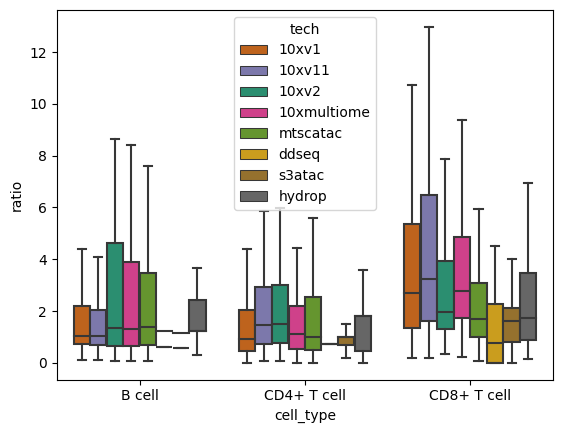

In [36]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="ratio",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

# instead try imputed accessibility

In [37]:
imputed_acc_obj_path = "downstream_analysis/imputed_acc_objs/master_celltypefair_1.FIXEDCELLS__imputed_acc_obs.pkl"
with open(imputed_acc_obj_path, "rb") as f:
    imputed_acc_obj = pickle.load(f)

In [38]:
# imputed_acc_obj_path = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/downstream_analysis/imputed_acc_objs/master_all_1.FIXEDCELLS__normalized_imputed_acc_obs.pkl"
# with open(imputed_acc_obj_path, "rb") as f:
#     imputed_acc_obj = pickle.load(f)

In [39]:
# import pickle

# cto_path = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged/cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus_harmony.pkl"
# with open(cto_path, "rb") as f:
#     cto = pickle.load(f)

In [40]:
cto.cell_data["fmx_sample"].fillna("none", inplace=True)
cto.cell_data["sex"] = [
    x.replace("sampleA", "Male").replace("sampleB", "Female")
    for x in cto.cell_data["fmx_sample"]
]

In [41]:
import numpy as np

In [42]:
imputed_acc_obj.mtx.shape

(198401, 35456)

In [43]:
sex_dict = {"Male": "Female", "Female": "Male"}

In [76]:
df_region_counts_merged = pd.DataFrame()
for cell_type, sex in [
    ("B cell", "Male"),
    ("CD4+ T cell", "Male"),
    ("CD8+ T cell", "Female"),
]:
    print(cell_type)
    # for sex in ["Male", "Female"]:
    print("\t" + sex)
    for tech in cto.cell_data["tech"].unique():
        cell_barcodes = cto.cell_data[
            (cto.cell_data["harmony_consensus_cell_type__mega"] == cell_type)
            & (cto.cell_data["sex"] == sex)
            & (cto.cell_data["tech"] == tech)
        ].index
        if not len(cell_barcodes) == 0:
            cell_barcodes_index = [
                list(imputed_acc_obj.cell_names).index(x) for x in cell_barcodes
            ]
            print(f"\t\t{tech} found {len(cell_barcodes)} {sex} cells")

            df_merged_sub = df_merged[
                (df_merged["cell_type_specific"] == cell_type + "s")
                & (df_merged["sex"] == sex)
            ]
            regions = list(
                df_merged_sub["chrom"]
                + ":"
                + [str(x) for x in df_merged_sub["start"]]
                + "-"
                + [str(x) for x in df_merged_sub["end"].astype(str)]
            )
            regions_index = [
                list(imputed_acc_obj.feature_names).index(x) for x in regions
            ]

            # now subset imputed acc obj for the main sex
            imputed_acc_obj_subset = imputed_acc_obj.mtx[
                np.ix_(regions_index[:], cell_barcodes_index[:])
            ]

            counts = [
                x / len(cell_barcodes)
                for x in imputed_acc_obj_subset.sum(axis=1).tolist()
            ]  # divide by the number of cell barcodes in this class

            # now calculate the same but for the opposite sex:
            sex2 = sex_dict[sex]
            cell_barcodes = cto.cell_data[
                (cto.cell_data["harmony_consensus_cell_type__mega"] == cell_type)
                & (cto.cell_data["sex"] == sex2)
                & (cto.cell_data["tech"] == tech)
            ].index
            if not len(cell_barcodes) == 0:

                cell_barcodes_index = [
                    list(imputed_acc_obj.cell_names).index(x) for x in cell_barcodes
                ]
                print(f"\t\t{tech} found {len(cell_barcodes)} {sex2} cells")

                imputed_acc_obj_subset = imputed_acc_obj.mtx[
                    np.ix_(regions_index[:], cell_barcodes_index[:])
                ]
                counts_sex2 = [
                    x / len(cell_barcodes)
                    for x in imputed_acc_obj_subset.sum(axis=1).tolist()
                ]  # divide by the number of cell barcodes in this class

                # calculate the ratio

                df_region_counts = pd.DataFrame()
                # counts_padded = np.pad(counts, (0, len(cto_copy.cell_data) - len(counts)))
                df_region_counts[f"counts_{sex2}"] = counts_sex2
                df_region_counts[f"counts_secondary_sex"] = counts_sex2

            df_region_counts[f"counts_{sex}"] = counts
            df_region_counts[f"counts_main_sex"] = counts
            # df_region_counts["counts"] = df_region_counts / len(regions)
            # df_region_counts["counts"] = df_region_counts / len(cto_copy.cell_data)

            df_region_counts["cell_type"] = cell_type
            df_region_counts["sex"] = sex
            df_region_counts["tech"] = tech
            df_region_counts["ratio"] = (
                df_region_counts[f"counts_main_sex"]
                / df_region_counts[f"counts_secondary_sex"]
            )
            df_region_counts = df_region_counts.sort_values(
                "ratio", ascending=False
            ).reset_index(drop=True)
            df_region_counts["rank"] = df_region_counts.index
            print(len(df_region_counts))
            # append
            df_region_counts_merged = pd.concat(
                [df_region_counts_merged, df_region_counts]
            )

B cell
	Male
		s3atac found 254 Male cells
		s3atac found 146 Female cells
1000
		10xmultiome found 337 Male cells
		10xmultiome found 218 Female cells
1000
		10xv11 found 239 Male cells
		10xv11 found 163 Female cells
1000
		hydrop found 172 Male cells
		hydrop found 209 Female cells
1000
		10xv2 found 211 Male cells
		10xv2 found 140 Female cells
1000
		ddseq found 123 Male cells
		ddseq found 75 Female cells
1000
		mtscatac found 328 Male cells
		mtscatac found 227 Female cells
1000
		10xv1 found 320 Male cells
		10xv1 found 235 Female cells
1000
CD4+ T cell
	Male
		s3atac found 228 Male cells
		s3atac found 230 Female cells
1000
		10xmultiome found 479 Male cells
		10xmultiome found 529 Female cells
1000
		10xv11 found 193 Male cells
		10xv11 found 283 Female cells
1000
		hydrop found 283 Male cells
		hydrop found 509 Female cells
1000
		10xv2 found 144 Male cells
		10xv2 found 215 Female cells
1000
		ddseq found 133 Male cells
		ddseq found 99 Female cells
1000
		mtscatac found 40

In [77]:
with pd.option_context(
    "display.max_rows",
    None,
    "display.max_columns",
    None,
    "display.precision",
    3,
):
    print(
        cto.cell_data.groupby(["sex", "tech"])[
            "harmony_consensus_cell_type__mega"
        ].value_counts()
    )

sex     tech         harmony_consensus_cell_type__mega
Female  10xmultiome  CD8+ T cell                           573
                     CD4+ T cell                           529
                     CD14+ monocyte                        409
                     B cell                                218
                     Natural killer cell                    66
                     CD16+ monocyte                         39
                     Dendritic cell                         32
        10xv1        CD8+ T cell                           635
                     CD4+ T cell                           580
                     CD14+ monocyte                        528
                     B cell                                235
                     Natural killer cell                    70
                     CD16+ monocyte                         53
                     Dendritic cell                         23
        10xv11       CD8+ T cell                           426


# CD4
sns.boxplot(
    data=df_region_counts_merged[df_region_counts_merged["cell_type"] == "CD4+ T cell"],
    x="tech",
    y="ratio",
    # hue="tech",
    # hue_order=tech_order,
    # palette=tech_color_palette,
    showfliers=False,
)

plt.xlabel("Technology")
plt.ylabel("Ratio of counts in Male vs Female CD4+ T cells")

# CD8

<AxesSubplot: xlabel='counts_Female', ylabel='counts_Male'>

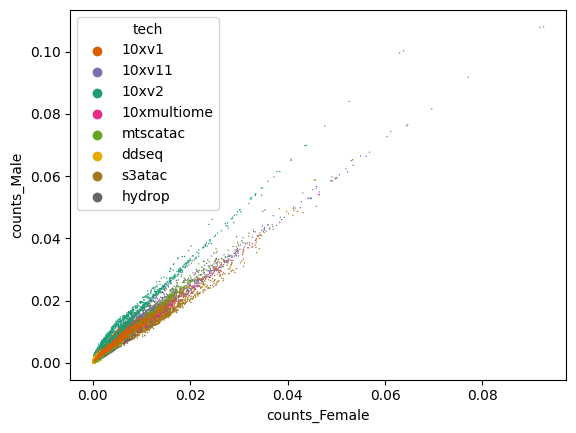

In [79]:
sns.scatterplot(
    data=df_region_counts_merged[df_region_counts_merged["sex"] == "Male"],
    x="counts_Female",
    y="counts_Male",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    s=1,
    linewidth=0,
)

(0.0, 0.05)

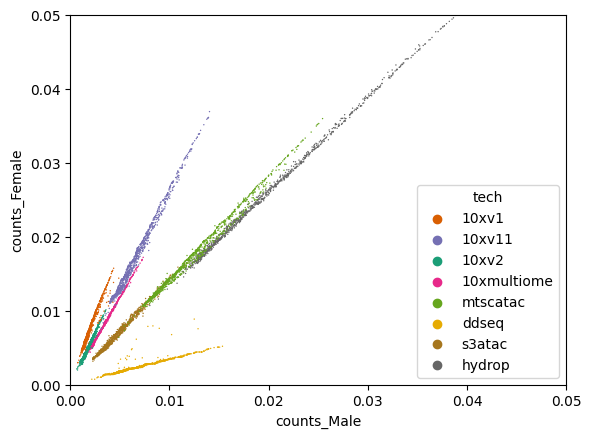

In [80]:
sns.scatterplot(
    data=df_region_counts_merged[df_region_counts_merged["sex"] == "Female"],
    x="counts_Male",
    y="counts_Female",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    s=1,
    linewidth=0,
)
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])

In [81]:
df_region_counts_merged["Technology"] = [
    tech_alias_dict[x] for x in df_region_counts_merged["tech"]
]

In [82]:
tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [83]:
tech_alias_order = [tech_alias_dict[x] for x in tech_order]

In [84]:
label_alias_dict = {
    "B cell": "B cells\nAccessibility in male/female",
    "CD4+ T cell": "CD4+ T cells\nAccessibility in male/female",
    "CD8+ T cell": "CD8+ T cells\nAccessibility in female/male",
}

In [85]:
df_region_counts_merged["label"] = [
    label_alias_dict[x] for x in df_region_counts_merged["cell_type"]
]

In [86]:
df_region_counts_merged[~pd.Series(df_region_counts_merged["ratio"] == np.inf)]

,counts_Female,counts_secondary_sex,counts_Male,counts_main_sex,cell_type,sex,tech,ratio,rank,Technology,label
0,0.000832,0.000832,0.001913,0.001913,B cell,Male,s3atac,2.298850,0,s3-ATAC,B cells\nAccessibility in male/female
1,0.000984,0.000984,0.002217,0.002217,B cell,Male,s3atac,2.254128,1,s3-ATAC,B cells\nAccessibility in male/female
2,0.001740,0.001740,0.003608,0.003608,B cell,Male,s3atac,2.073375,2,s3-ATAC,B cells\nAccessibility in male/female
3,0.002190,0.002190,0.004506,0.004506,B cell,Male,s3atac,2.057886,3,s3-ATAC,B cells\nAccessibility in male/female
4,0.001438,0.001438,0.002908,0.002908,B cell,Male,s3atac,2.022796,4,s3-ATAC,B cells\nAccessibility in male/female
...,...,...,...,...,...,...,...,...,...,...,...
995,0.008624,0.003001,0.003001,0.008624,CD8+ T cell,Female,10xv1,2.873952,995,10x v1,CD8+ T cells\nAccessibility in female/male
996,0.008706,0.003049,0.003049,0.008706,CD8+ T cell,Female,10xv1,2.855259,996,10x v1,CD8+ T cells\nAccessibility in female/male
997,0.008841,0.003106,0.003106,0.008841,CD8+ T cell,Female,10xv1,2.846053,997,10x v1,CD8+ T cells\nAccessibility in female/male
998,0.010643,0.003866,0.003866,0.010643,CD8+ T cell,Female,10xv1,2.753040,998,10x v1,CD8+ T cells\nAccessibility in female/male


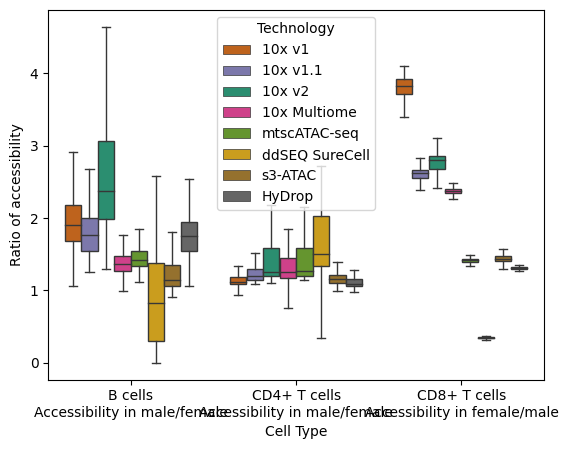

In [72]:
sns.boxplot(
    data=df_region_counts_merged[
        ~pd.Series(df_region_counts_merged["ratio"] == np.inf)
    ],
    x="label",
    y="ratio",
    hue="Technology",
    hue_order=tech_alias_order,
    palette=tech_alias_color_palette,
    showfliers=False,
    linewidth=1,
)
plt.xlabel("Cell Type")
plt.ylabel("Ratio of accessibility")
plt.savefig(
    "plts_final/male_female_dar_accessibility.png",
    dpi=300,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/male_female_dar_accessibility.svg",
    dpi=300,
    facecolor="white",
    bbox_inches="tight",
)

<AxesSubplot: xlabel='cell_type', ylabel='counts_Female'>

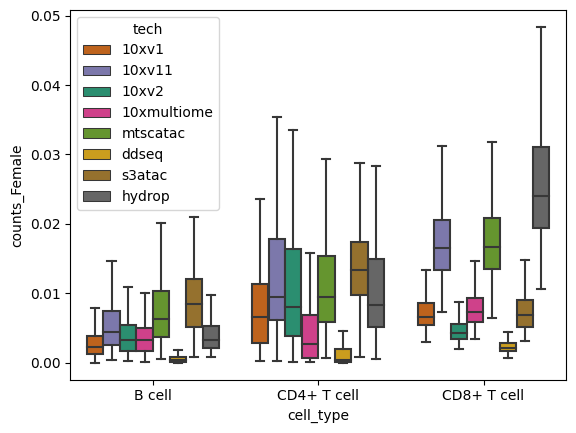

In [73]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="counts_Female",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

<AxesSubplot: xlabel='cell_type', ylabel='counts_Male'>

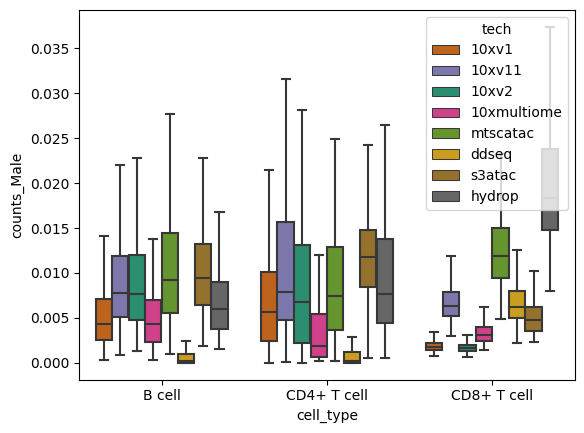

In [74]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="counts_Male",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
)

<AxesSubplot: xlabel='cell_type', ylabel='ratio'>

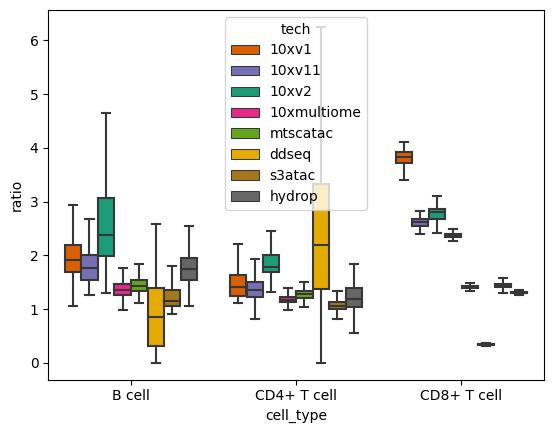

In [120]:
sns.boxplot(
    data=df_region_counts_merged,
    x="cell_type",
    y="ratio",
    hue="tech",
    hue_order=tech_order,
    palette=tech_color_palette,
    showfliers=False,
    saturation=1,
)